In [32]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html#scipy.integrate.RK45
from scipy.integrate import solve_ivp

# Target: We want to mimic the activity of a 3 neuron network with a HH neuron

<img src="./3_neuron_example.png" alt="drawing" width="900" />

Tasks:

1. Use simple HH neurons to build this network
2. Use different HH neurons to build this network
3. Use different DDF neurons to build this network


### First, code up a solution with non-modular code

Steps

1. define differential equation to calculate update values at different states
2. specify time bound, number of steps, and initial condition
3. use Runge-Kutta method to integrate forward in time
4. create each component's plot and attractor plot

Variables

- Each Neuron has 4 variables (m, h, n, V); in a 3 neurons, 4 synapses network, we have a total of 12 variables.

Here is a table:

| Variable Name | Math Notation | Description                     |
| :------------ | :------------ | :------------------------------ |
| m_1           | $m_1(t)$      | Neuron 1: Na gating variable #1 |
| h_1           | $h_1(t)$      | Neuron 1: Na gating variable #2 |
| n_1           | $n_1(t)$      | Neuron 1: K gating variable     |
| m_2           | $m_2(t)$      | Neuron 2: Na gating variable #1 |
| h_2           | $h_2(t)$      | Neuron 2: Na gating variable #2 |
| n_2           | $n_2(t)$      | Neuron 2: K gating variable     |
| m_3           | $m_3(t)$      | Neuron 3: Na gating variable #1 |
| h_3           | $h_3(t)$      | Neuron 3: Na gating variable #2 |
| n_3           | $n_3(t)$      | Neuron 3: K gating variable     |
| V_1           | $V_1(t)$      | Neuron 1: Voltage               |
| V_2           | $V_2(t)$      | Neuron 2: Voltage               |
| V_3           | $V_3(t)$      | Neuron 3: Voltage               |

Constants

- There are 3 gating constants for each neuron, and 1 gating constant for each synapse.
- In addition, each neuron has 4 field constants, and 2 voltage constants.

Here is another table:

<!-- FOR NEURON -->

#### NEURON 1

| Constant Name | Math Notation  | Description                    |
| :------------ | :------------- | :----------------------------- |
| g_Na_1        | $g_{Na_1}$     | Neuron 1: Na gating constant   |
| g_K_1         | $g_{K_1}$      | Neuron 1: K gating constant    |
| g_L_1         | $g_{L_1}$      | Neuron 1: Leak gating constant |
| E_Na_1        | $E_{Na_1}$     |                                |
| E_K_1         | $E_{K_1}$      |                                |
| E_L_1         | $E_{L_1}$      |                                |
| V0_m_1        | $V0_{m_1}$     |                                |
| V0_h_1        | $V0_{h_1}$     |                                |
| V0_n_1        | $V0_{n_1}$     |                                |
| dV0_m_1       | $dV0_{m_1}$    |                                |
| dV0_h_1       | $dV0_{h_1}$    |                                |
| dV0_n_1       | $dV0_{n_1}$    |                                |
| tau_m_1_0     | $\tau_{m_1-0}$ |                                |
| tau_m_1_1     | $\tau_{m_1-1}$ |                                |
| tau_h_1_0     | $\tau_{h_1-0}$ |                                |
| tau_h_1_1     | $\tau_{h_1-1}$ |                                |
| tau_n_1_0     | $\tau_{n_1-0}$ |                                |
| tau_n_1_1     | $\tau_{n_1-1}$ |                                |

#### NEURON 2

| Constant Name | Math Notation  | Description                    |
| :------------ | :------------- | :----------------------------- |
| g_Na_2        | $g_{Na_2}$     | Neuron 2: Na gating constant   |
| g_K_2         | $g_{K_2}$      | Neuron 2: K gating constant    |
| g_L_2         | $g_{L_2}$      | Neuron 2: Leak gating constant |
| E_Na_2        | $E_{Na_2}$     |                                |
| E_K_2         | $E_{K_2}$      |                                |
| E_L_2         | $E_{L_2}$      |                                |
| V0_m_2        | $V0_{m_2}$     |                                |
| V0_h_2        | $V0_{h_2}$     |                                |
| V0_n_2        | $V0_{n_2}$     |                                |
| dV0_m_2       | $dV0_{m_2}$    |                                |
| dV0_h_2       | $dV0_{h_2}$    |                                |
| dV0_n_2       | $dV0_{n_2}$    |                                |
| tau_m_2_0     | $\tau_{m_2-0}$ |                                |
| tau_m_2_1     | $\tau_{m_2-1}$ |                                |
| tau_h_2_0     | $\tau_{h_2-0}$ |                                |
| tau_h_2_1     | $\tau_{h_2-1}$ |                                |
| tau_n_2_0     | $\tau_{n_2-0}$ |                                |
| tau_n_2_1     | $\tau_{n_2-1}$ |                                |

#### NEURON 3

| Constant Name | Math Notation  | Description                    |
| :------------ | :------------- | :----------------------------- |
| g_Na_3        | $g_{Na_3}$     | Neuron 3: Na gating constant   |
| g_K_3         | $g_{K_3}$      | Neuron 3: K gating constant    |
| g_L_3         | $g_{L_3}$      | Neuron 3: Leak gating constant |
| E_Na_3        | $E_{Na_3}$     |                                |
| E_K_3         | $E_{K_3}$      |                                |
| E_L_3         | $E_{L_3}$      |                                |
| V0_m_3        | $V0_{m_3}$     |                                |
| V0_h_3        | $V0_{h_3}$     |                                |
| V0_n_3        | $V0_{n_3}$     |                                |
| dV0_m_3       | $dV0_{m_3}$    |                                |
| dV0_h_3       | $dV0_{h_3}$    |                                |
| dV0_n_3       | $dV0_{n_3}$    |                                |
| tau_m_3_0     | $\tau_{m_3-0}$ |                                |
| tau_m_3_1     | $\tau_{m_3-1}$ |                                |
| tau_h_3_0     | $\tau_{h_3-0}$ |                                |
| tau_h_3_1     | $\tau_{h_3-1}$ |                                |
| tau_n_3_0     | $\tau_{n_3-0}$ |                                |
| tau_n_3_1     | $\tau_{n_3-1}$ |                                |

#### FOR SYNAPSE

| Constant Name | Math Notation | Description                       |
| :------------ | :------------ | :-------------------------------- |
| g_12          | $g_12$        | Synapse 12: gating constant       |
| g_31          | $g_31$        | Synapse 31: gating constant       |
| g_23          | $g_23$        | Synapse 23: gating constant       |
| g_32          | $g_32$        | Synapse 32: gating constant       |
| V0_12         | $V0_12$       | Synapse 12: synapse voltage       |
| V0_31         | $V0_31$       | Synapse 31: synapse voltage       |
| V0_23         | $V0_23$       | Synapse 23: synapse voltage       |
| V0_32         | $V0_32$       | Synapse 32: synapse voltage       |
| dV0_12        | $dV0_12$      | Synapse 12: synapse voltage delta |
| dV0_31        | $dV0_31$      | Synapse 31: synapse voltage delta |
| dV0_23        | $dV0_23$      | Synapse 23: synapse voltage delta |
| dV0_32        | $dV0_32$      | Synapse 32: synapse voltage delta |

Shared Constants

| Constant Name | Math Notation | Description                                                            |
| :------------ | :------------ | :--------------------------------------------------------------------- |
| tau1          | $\tau_{1}$    | Neuron 1: excitatory postsynaptic tau constant at the denominator of S |
| tau2          | $\tau_{2}$    | Neuron 2: inhibitory postsynaptic tau constant at the denominator of S |
| E_rev_e       | $E_{rev_1}$   |                                                                        |
| E_rev_i       | $E_{rev_2}$   |                                                                        |
| alpha         | $\alpha$      | synaptic constant                                                      |


In [1]:
# # define constants 

# # Shared 
# C = 1.0 

# # Neuron 1 
# g_Na_1, g_K_1, g_L_1 = 120.0, 20.0, 0.3 
# E_Na_1, E_K_1, E_L_1 = 50.0, -77.0, -54.4 
# V0_m_1, V0_h_1, V0_n_1 = -40.0, -60.0, -55.0
# dV0_m_1, dV0_h_1, dV0_n_1 = 15.0, -15.0, 30.0
# tau_m_1_0, tau_m_1_1 = 0.1, 0.4
# tau_h_1_0, tau_h_1_1 = 1.0, 7.0
# tau_n_1_0, tau_n_1_1 = 1.0, 5.0

# # Neuron 2
# g_Na_2, g_K_2, g_L_2 = 120.0, 20.0, 0.3 
# E_Na_2, E_K_2, E_L_2 = 50.0, -77.0, -54.4 
# V0_m_2, V0_h_2, V0_n_2 = -40.0, -60.0, -55.0
# dV0_m_2, dV0_h_2, dV0_n_2 = 15.0, -15.0, 30.0
# tau_m_2_0, tau_m_2_1 = 0.1, 0.4
# tau_h_2_0, tau_h_2_1 = 1.0, 7.0
# tau_n_2_0, tau_n_2_1 = 1.0, 5.0

# # Neuron 3
# g_Na_3, g_K_3, g_L_3 = 120.0, 20.0, 0.3 
# E_Na_3, E_K_3, E_L_3 = 50.0, -77.0, -54.4 
# V0_m_3, V0_h_3, V0_n_3 = -40.0, -60.0, -55.0
# dV0_m_3, dV0_h_3, dV0_n_3 = 15.0, -15.0, 30.0
# tau_m_3_0, tau_m_3_1 = 0.1, 0.4
# tau_h_3_0, tau_h_3_1 = 1.0, 7.0
# tau_n_3_0, tau_n_3_1 = 1.0, 5.0

# # Synapses
# g_12 = 0.35
# g_23 = 0.27
# g_32 = 0.215
# g_31 = 0.203

# # what are E_rev's 
# E_rev_e = 0.0 
# E_rev_i = -80.0

# tau1 = 1.0
# tau2 = 3.0
# S1 = 3.0/2.0
# S2 = 5.0/3.0

In [2]:
C = 1.0
gn = 120.
vna = 50.
gk = 20.0
vk = -77.
gl = 0.3
vl = -54.4
vn = -55.0
dvn = 30.0
tn0 = 1.0
tn1 = 5.0
vm = -40.0
dvm = 15.0
tm0 = 0.1
tm1 = 0.4
vh = -60.0
dvh = -15.0
th0 = 1.0
th1 = 7.0
g12 = 0.35
g23 = 0.27
g32 = 0.215
g31 = 0.203
Ereve = 0.0
Erevi = -80.0
tau1 = 1.0
tau2 = 3.0
S1 = 3.0/2.0
S2 = 5.0/3.0
v0=-5
dv0=5

In [11]:
# functions 

def S0(V, V0=-0.5, dV0=5.0): 
    """Update synapse baseline S(V)"""
    return 0.5*(1.0 + math.tanh((V-V0)/dV0))

def tau(V, t0, t1, V0, dV0):
    """Denominator of update function for m(t), h(t), n(t)""" 
    return t0 + t1*(1.0 - math.tanh((V-V0)/dV0)**2)

def dSdt(V, S, S_const, tau_const): 
    """Question: how to write S0(v)"""
    term1 = (S0(V) - S)
    term2 = tau_const*(S_const - S0(V))
    return term1/term2

def g_syn(V,V0,dV0): 
    """Numerator of update function for m(t), h(t), n(t)"""
    return 0.5 + 0.5 * math.tanh((V-V0)/dV0)

def dMdt(V, m):
    term1 = g_syn(V, vm, dvm) - m
    term2 = tau(V, tm0, tm1, vm, dvm)
    return term1 / term2

def dHdt(V, h):
    term1 = g_syn(V, vh, dvh) - h
    term2 = tau(V, th0, th1, vh, dvh)
    return term1 / term2

def dNdt(V, n):
    term1 = g_syn(V, vn, dvn) - n
    term2 = tau(V, tn0, tn1, vn, dvn)
    return term1 / term2

# from henry
def F(V, m, h, n): 
    """Intrinsic HH model neuron"""
    term1 = gn*m**3*h*(vna - V) 
    term2 = gk*n**4*(vk - V)
    term3 = gl*(vl - V)
    return term1 + term2 + term3

def dV1dt(V1, m, h, n, S12, Istim1=None): 
    term1 = F(V1, m, h, n) 
    term2 = g12*S12*(Ereve - V1)
    return term1 + term2 
    
def dV2dt(V2, m, h, n, S23, Istim2): 
    term1 = F(V2, m, h, n)
    term2 = g23*S23*(Ereve - V2)
    term3 = Istim2 
    return term1 + term2 + term3

def dV3dt(V3, m, h, n, S31, S32, Istim3):
    term1 = F(V3, m, h, n)
    term2 = g31*S31*(Erevi - V3)
    term3 = g32*S32*(Erevi - V3)
    term4 = Istim3 
    return term1 + term2 + term3 + term4

In [39]:
states0 = 0.1*np.ones(16) 
"""
Order of the states: 

V1, V2, V3
m1, m2, m3
h1, h2, h3
n1, n2, n3

S12, S23, S31, S32
"""
Istim2 = 40 
Istim3 = 10 

def dfdt(t, states, Istim_interp): 
    V1, V2, V3, m1, m2, m3, h1, h2, h3, n1, n2, n3, S12, S23, S31, S32 = states
    Istim1 = Istim_interp(t)[0]
    Istim2 = Istim_interp(t)[1]
    Istim3 = Istim_interp(t)[2]
    dv1dt = dV1dt(V1,m1, h1, n1, S12, Istim1) 
    dv2dt = dV2dt(V2,m2, h2, n2, S23, Istim2) 
    dv3dt = dV3dt(V3,m3, h3, n3, S31, S32, Istim3) 
    
    dm1dt = dMdt(V1, m1)
    dm2dt = dMdt(V2, m2)
    dm3dt = dMdt(V3, m3)
    
    dh1dt = dHdt(V1, h1)
    dh2dt = dHdt(V2, h2)
    dh3dt = dHdt(V3, h3)
    
    dn1dt = dNdt(V1, n1)
    dn2dt = dNdt(V2, n2)
    dn3dt = dNdt(V3, n3)
    
    ds12dt = dSdt(V2, S12, S1, tau1)
    ds23dt = dSdt(V3, S23, S1, tau1)
    ds31dt = dSdt(V1, S31, S2, tau2)
    ds32dt = dSdt(V3, S32, S2, tau2)
    
    dstatesdt_lst = [dv1dt, dv2dt, dv3dt, dm1dt, dm2dt, dm3dt, dh1dt, dh2dt, dh3dt, dn1dt, dn2dt, dn3dt, ds12dt, ds23dt, ds31dt, ds32dt]
    return dstatesdt_lst

In [40]:
# sol = solve_ivp(dfdt, t_span=[0, 1000], y0=states0, t_eval=np.arange(0, 1000, 0.02))

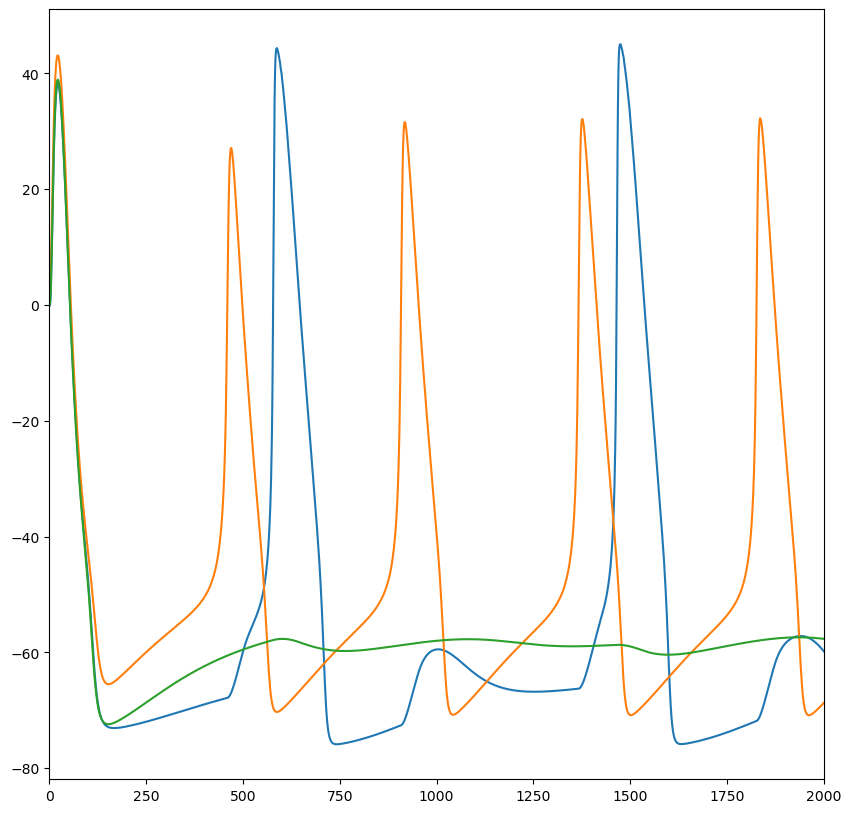

In [41]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 2000)
plt.plot(sol.y.T[:, :3])

### Interpolated Current Version

In [46]:
states0 = 0.1*np.ones(16) 
"""
Order of the states: 

V1, V2, V3
m1, m2, m3
h1, h2, h3
n1, n2, n3

S12, S23, S31, S32
"""
timeseries = np.arange(0, 1000, 0.02)
I_arr_wider = np.arange(-1, 1001, 0.02)
Istim = np.ones((I_arr_wider.shape[0], 3)) # each column is an Istim
Istim[:, 0] *= 0 
Istim[:, 1] *= 40
Istim[:, 2] *= 10

# make an interpolation object 
Istim_interp = interp1d(I_arr_wider, Istim, axis=0)

sol = solve_ivp(dfdt, t_span=[0, 1000], y0=states0, t_eval=np.arange(0, 1000, 0.02), args=(Istim_interp,))

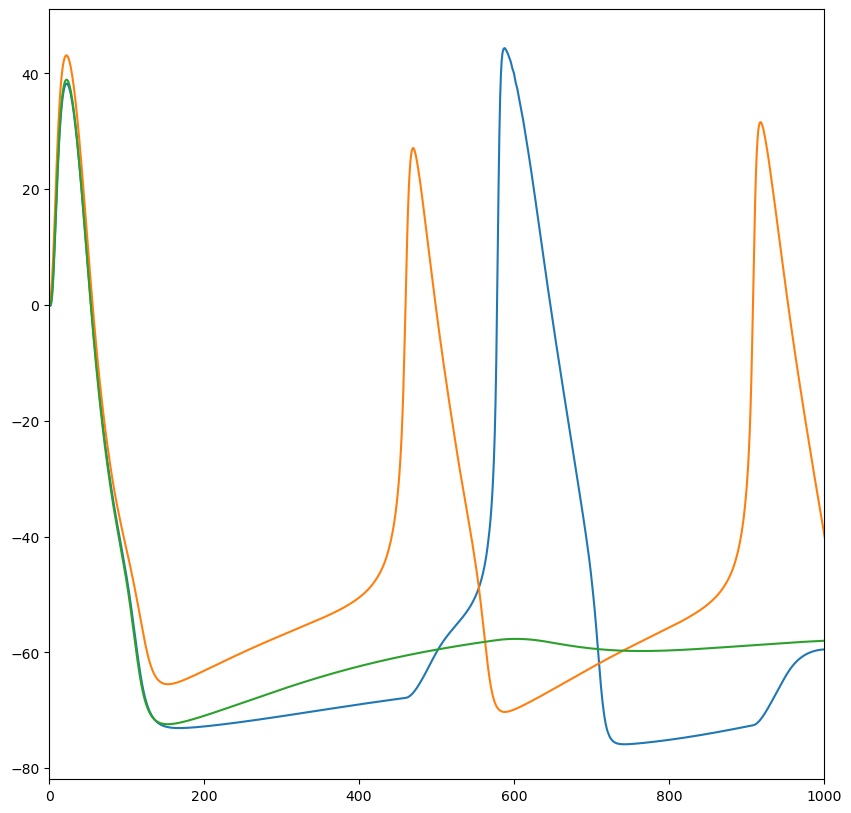

In [52]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 1000)
plt.plot(sol.y.T[:, :3])